# Data Science - Mini Project 3 - Alex Montoya Franco
## Twitter Network Analysis

With this mini project we intend to answer the following questions:

1. Is the movie going experience still relevant in today’s pop culture compared to the attention that streaming services are facing?

2. What is the evolution of consumer’s behaviour, denoted by number of tweets, trending topics, hashtags, social interactions, in terms of theatrical experiences vs streaming services? 

3. Is it possible to predict this behaviour for the next few years?

## Data Gathering Part (API Credentials Required)
For this part Twitter's Academic Research Access is needed. If you have it, feel free to put your credentials in here to run the cells. If not, the cells' outputs are prove of the execution flow. The data is finally loaded to csv files which are attached to the submission.
The second part of the notebook therefore uses the csv to load the data and make the required analysis.

### Setting up Tweepy

In [ ]:
# Using tweepy to conveniently access twitter's API data 
! pip install tweepy==4.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 9.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [ ]:
import tweepy

Academic Research Access was requested in order to get historical data from Twitter and be able to build our time series and forecasting. The access was granted. Here the different keys were copied to authenticate us against the API. However, for the submission the tokens will be removed and further cells (in the second part of this notebook) can be executed using the csv files generated.

In [ ]:
# Academic Research Access Tokens
api_key = ""
api_key_secret = ""

access_token = ""
access_token_secret = ""

bearer_token = ""

In [ ]:
# Building client for requesting data to the API
client = tweepy.Client(
    wait_on_rate_limit = True,
    consumer_key = api_key,
    consumer_secret = api_key_secret,
    access_token = access_token,
    access_token_secret = access_token_secret,
    bearer_token = bearer_token,
)

In [ ]:
client

### Testing Twitter's Endpoints

[Tweet Counts](https://developer.twitter.com/en/docs/twitter-api/tweets/counts/introduction)

In [ ]:
# Count the number of tweets mentioning netflix in a given day
test1_counts = client.get_all_tweets_count(query='netflix -is:retweet', granularity='day', start_time='2022-03-10T00:01:00.000Z', end_time='2022-03-10T23:59:00.000Z')

In [ ]:
for i in test1_counts.data:
    print(i["tweet_count"])

98722


[Search Tweets](https://developer.twitter.com/en/docs/twitter-api/tweets/search/introduction)

In [ ]:
# Get all tweets mentioning netflix in a given day
test1_search = client.search_all_tweets(
    query = "netflix -is:retweet lang:en",
    start_time='2022-03-10T00:01:00.000Z', 
    end_time='2022-03-10T23:59:00.000Z',
    expansions = ["author_id", "geo.place_id"],
    tweet_fields = ["created_at", "public_metrics", "text"],
    user_fields = ["id", "name", "public_metrics", "username", "verified"],
    place_fields = ["id", "name", "country", "country_code"],
    max_results = 10
)

In [ ]:
test1_search.data[9].data

{'created_at': '2022-03-10T23:58:33.000Z',
 'author_id': '81836744',
 'text': 'No one told me how good ‘Good Girls’ on Netflix is. 🔥',
 'public_metrics': {'retweet_count': 0,
  'reply_count': 1,
  'like_count': 1,
  'quote_count': 0},
 'edit_history_tweet_ids': ['1502071441663176714'],
 'id': '1502071441663176714'}

In [ ]:
test1_search.includes

{'users': [<User id=226255608 name=Alex Lake username=a___lake>,
  <User id=1700621616 name=Darlene Montz🧚‍♂️🎭💛🖤⚜️ username=dandb200>,
  <User id=914531877230465024 name=Kayla Wayla username=kayladonniece>,
  <User id=976604963743842304 name=NetflixFilm username=NetflixFilm>,
  <User id=1849612543 name=Bella Noches ♍️ username=beautynbullshit>,
  <User id=1464703884954324993 name=Kewchie Mane ❄️ username=AssKetchum_>,
  <User id=51321812 name=CoolBeans username=JordanBurnz>,
  <User id=1404352830492794881 name=🎸 username=Gary39348024>,
  <User id=632375790 name=librat 🛍 username=Pinkydagreat>,
  <User id=81836744 name=theMisses.AB username=Not_Y0urBae>]}

[Tweet Annotations](https://developer.twitter.com/en/docs/twitter-api/annotations/overview)

In [ ]:
# Get the tweet's context annotations e.g, [86 Movie] [3 TV Shows] [47 Brand]
test1_context_search = client.search_recent_tweets(
    query = "netflix -is:retweet lang:en",
    tweet_fields = ["text", "context_annotations"],
    max_results = 10,
)

In [ ]:
test1_context_search.data[9].data

{'text': 'Lagi cari apa bunda? Netflix spotify grammarly akun coursehero x course hero youtube canva quizlet plus picsart gold wetv scribd disney+ hotstar bisa banget ke pmjro T. Jual beli wtb need #zonauang https://t.co/IAikoUhA3h',
 'id': '1589327569014312960',
 'edit_history_tweet_ids': ['1589327569014312960'],
 'context_annotations': [{'domain': {'id': '45',
    'name': 'Brand Vertical',
    'description': 'Top level entities that describe a Brands industry'},
   'entity': {'id': '781974597310615553', 'name': 'Entertainment'}},
  {'domain': {'id': '30',
    'name': 'Entities [Entity Service]',
    'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'},
   'entity': {'id': '781974597105094656',
    'name': 'TV/Movies Related - Entertainment'}},
  {'domain': {'id': '47',
    'name': 'Brand',
    'description': 'Brands and Companies'},
   'entity': {'id': '10026367762', 'name': 'Netflix'}},
  {'domain': {'id': '47',
    'name':

### Learning how to build a query
[Building queries for Search Tweets](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query) - [Building high-quality filters for getting Twitter data](https://developer.twitter.com/en/docs/tutorials/building-high-quality-filters)

The Data that we required for this project is mainly the count of tweets addressing both "movie going experiences" and "streaming experiences". In this sense, we don't need to go to the detail of each tweet, but just want to analyze which topic is more popular.
On the other hand, these two topics are not very specific. For instance, how do we identify that a tweet refers to a "streaming experience"?
We consider that the key is in how we construct the queries that are gonna provide that the "right" data.

* Movie going experience:
  * Mention of main cinema chains
  * Mention of big movies (released on cinemas)
  * Context annotations - Domains/Entities (For example, Movie Festival)

* Streaming experience:
  * Mention of streaming services (Netflix, Disney+, HBO Max, Paramount+, AppleTV+, Amazon Prime Video)
  * Mention of Streaming TV Shows (e.g., Stranger Things, The Crown)
  * Context annotations - Domains/Entities (TV Shows, TV Episodes, Global TV Show) 

Building a Query (with Academic Research access)
* Query can be 1024 characters long
* Advanced Operators are available
* Standalone operator:
  - `#hashtag` operator. e.g., `#twitterapiv2`
* Conjunction-required (they can only be used when at least one standalone operator is included in the query):
  - `"twitter data" has:mentions (has:media OR has:links) is:retweet`
  - `(place_country:US OR place_country:MX OR place_country:CA)` for north-america tweets
  - Include `has:geo` to compare locations.
  - We noticed that we were getting Tweets in a variety of different languages. In this situation, we want to only receive Tweets that are in english with `lang:en` (possible future NLP has proven to be more effective and have more information available for english language)
  - `from:<twitter account>`
  - `-is:nullcast` - Removes Tweets created for promotion only on ads.twitter.com. This operator must be negated. Example: "mobile games" `-is:nullcast` (No interest in tweets for advertisement since this will lead to who is advertising more, instead of who is generating more interest)
* Boolean Operators
  - [AND] `snow day #NoSchool` will match Tweets containing the terms `snow` and `day` and the hashtag `#NoSchool`
  - [OR] `grumpy OR cat OR #meme` will match any Tweets containing at least the terms `grumpy` or `cat`, or the hashtag `#meme`
  - [NOT] `cat #meme -grumpy` will match Tweets containing the hashtag `#meme` and the term `cat`, but only if they do not contain the term `grumpy`. One common query clause is `-is:retweet`, which will not match on Retweets, thus matching only on original Tweets, Quote Tweets, and replies.
* Grouping Operators: `(grumpy cat) OR (#meme has:images)` will return either Tweets containing the terms `grumpy` and `cat`, or Tweets with images containing the hashtag `#meme`. Do not negate a set of operators grouped together in a set of parentheses. Instead, negate each individual operator. 
* All operators are evaluated in a case-insensitive manner. For example, the query `cat` will match Tweets with all of the following: cat, CAT, Cat.

Query Examples
* `#nowplaying (happy OR exciting OR excited OR favorite OR fav OR amazing OR lovely OR incredible) (place_country:US OR place_country:MX OR place_country:CA) -horrible -worst -sucks -bad -disappointing`

Find Tweets that relate to a specific Tweet annotation.
To do this, we used the `context:` operator to take advantage of the Tweet annotation functionality.

`context:domain_id.entity_id`

What are our domains and entities?

Context
- `context:domain_id.entity_id [This will give you all Tweets about an entity within that domain]`
- `context:domain_id.* [This will give you all Tweets about that domain]`

Entity
- `entity:entity_name [entity name is the string value, name for the entity]`

We first need to use the Tweet lookup endpoint and the `tweet.fields=context_annotations` fields parameter to identify which domain.entity IDs we need to use in our query

### Query Building Process
What query we end up with is as important in this project as the data analysis of the captured data. If we use a unreliable query, then any derived analysis is not as reliable as we would hope.

Identifying our relevant contexts:

Domain 131 (Unified Twitter Taxonomy) refers to Twitter's User Facing Interest Taxonomy. This taxonomy helps to power features on the platform such as, Topics.

* name: TV streaming services 
  - domain: 131
  - entity: 1397573214239289349



In [ ]:
streaming_services = "(netflix OR disney+ OR disneyplus OR hbomax OR hulu OR appletvplus OR peacock OR primevideo)"
original_content = "(show OR series OR episode OR streaming OR original OR season OR documentary)"
query_operators = "-is:retweet lang:en -is:nullcast"

In [ ]:
streaming_query = f'{streaming_services} {original_content} {query_operators}'

In [ ]:
print(streaming_query)

(netflix OR disney+ OR disneyplus OR hbomax OR hulu OR appletvplus OR peacock OR primevideo) (show OR series OR episode OR streaming OR original OR season OR documentary) -is:retweet lang:en -is:nullcast


In [ ]:
experience = "(watch OR IMAX OR Dolby OR 4DX OR theatrical OR drink OR snacks)"
cinema_locations_chains = "(theatre OR theater OR cinema OR amc OR cineworld OR cinemark OR cinepolis OR cineplex OR vue OR cgv OR cinemex OR wanda OR pvr OR kinepolis OR finnkino OR odeon)"
movies = "(film OR movie OR screening OR showtime OR premier OR franchise)"
spam = "-bluray"

In [ ]:
cinema_query = f'{experience} {cinema_locations_chains} {movies} {query_operators} {spam}'

In [ ]:
print(cinema_query)

(watch OR IMAX OR Dolby OR 4DX OR theatrical OR drink OR snacks) (theatre OR theater OR cinema OR amc OR cineworld OR cinemark OR cinepolis OR cineplex OR vue OR cgv OR cinemex OR wanda OR pvr OR kinepolis OR finnkino OR odeon) (film OR movie OR screening OR showtime OR premier OR franchise) -is:retweet lang:en -is:nullcast -bluray


In [ ]:
eda1_counts = client.get_all_tweets_count(
	query = streaming_query, 
	granularity='day',
	start_time='2022-05-27T00:00:00.000Z', 
	end_time='2022-05-28T00:00:00.000Z'
)

In [ ]:
for i in eda1_counts.data:
    print(i["tweet_count"])

15451


In [ ]:
movies_eda1_counts = client.get_all_tweets_count(
	query = cinema_query, 
	granularity='day',
	start_time='2022-10-27T00:00:00.000Z', 
	end_time='2022-10-28T00:00:00.000Z'
)

In [ ]:
for i in movies_eda1_counts.data:
    print(i["tweet_count"])

489


In [ ]:
eda1_search = client.search_all_tweets(
    query = streaming_query,
    start_time='2022-05-27T00:00:00.000Z', 
    end_time='2022-05-28T00:00:00.000Z',
    expansions = ["author_id", "geo.place_id"],
    tweet_fields = ["created_at", "public_metrics", "text", "context_annotations"],
    user_fields = ["id", "name", "public_metrics", "username", "verified"],
    place_fields = ["id", "name", "country", "country_code"],
    max_results = 10
)

In [ ]:
movie_eda1_search = client.search_all_tweets(
    query = cinema_query,
    start_time='2022-10-26T23:00:00.000Z', 
    end_time='2022-10-27T01:00:00.000Z',
    expansions = ["author_id", "geo.place_id"],
    tweet_fields = ["created_at", "public_metrics", "text", "context_annotations"],
    user_fields = ["id", "name", "public_metrics", "username", "verified"],
    place_fields = ["id", "name", "country", "country_code"],
    max_results = 10
)

In [ ]:
eda1_list = eda1_search.data[0].data

In [ ]:
movie_eda1_list = movie_eda1_search.data[0].data

In [ ]:
for key in eda1_list:
  print(key)

id
author_id
context_annotations
created_at
text
edit_history_tweet_ids
public_metrics


In [ ]:
print(eda1_list["text"])

At $30M per episode, I’m pretty sure S4 of #StrangerThings is the season finale of Netflix 🍿


In [ ]:
print(movie_eda1_list["text"])

@WhyYaseen can’t wait for the film! 
pretty sure i can remember going to the cinema to watch the first one that came out :)


In [ ]:
print(eda1_list["context_annotations"])

[{'domain': {'id': '3', 'name': 'TV Shows', 'description': 'Television shows from around the world'}, 'entity': {'id': '10045675573', 'name': 'Stranger Things (Netflix)'}}, {'domain': {'id': '3', 'name': 'TV Shows', 'description': 'Television shows from around the world'}, 'entity': {'id': '10046426305', 'name': 'Stranger Things'}}, {'domain': {'id': '3', 'name': 'TV Shows', 'description': 'Television shows from around the world'}, 'entity': {'id': '10051425401', 'name': 'Stranger Things'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '1223187634983292929', 'name': 'Stranger Things'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '1276514328007467008', 'name': 'Movies & TV'}}, {'domain': {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}, 'entity': {'id': '128348107095699865

In [ ]:
contexts = eda1_list["context_annotations"]
for i in contexts:
  for key in i.keys():
    print(key, '->', i[key])

domain -> {'id': '3', 'name': 'TV Shows', 'description': 'Television shows from around the world'}
entity -> {'id': '10045675573', 'name': 'Stranger Things (Netflix)'}
domain -> {'id': '3', 'name': 'TV Shows', 'description': 'Television shows from around the world'}
entity -> {'id': '10046426305', 'name': 'Stranger Things'}
domain -> {'id': '3', 'name': 'TV Shows', 'description': 'Television shows from around the world'}
entity -> {'id': '10051425401', 'name': 'Stranger Things'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}
entity -> {'id': '1223187634983292929', 'name': 'Stranger Things'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}
entity -> {'id': '1276514328007467008', 'name': 'Movies & TV'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}
entity -> {'id': '1283481070956998656', 'name': 'Sci-fi & f

In [ ]:
movie_contexts = movie_eda1_list["context_annotations"]
for i in movie_contexts:
  for key in i.keys():
    print(key, '->', i[key])

domain -> {'id': '46', 'name': 'Business Taxonomy', 'description': 'Categories within Brand Verticals that narrow down the scope of Brands'}
entity -> {'id': '1557696802391859201', 'name': 'Entertainment & Leisure Business', 'description': 'Brands, companies, advertisers and every non-person handle with the profit intent related to movies, music, television, franchises, venues, theme parks, toys, tourism, hotels'}


In [ ]:
eda1_value_1 = eda1_search.data[1].data
print(eda1_value_1["text"])
print(eda1_value_1["context_annotations"])

343/Microsoft should have leased the halo series to Disney before that dumpster fire of a first season.
[{'domain': {'id': '45', 'name': 'Brand Vertical', 'description': 'Top level entities that describe a Brands industry'}, 'entity': {'id': '781974597310615553', 'name': 'Entertainment'}}, {'domain': {'id': '30', 'name': 'Entities [Entity Service]', 'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'}, 'entity': {'id': '781974597218340864', 'name': 'Video Games - Entertainment'}}, {'domain': {'id': '71', 'name': 'Video Game', 'description': 'A video game like Overwatch'}, 'entity': {'id': '10024663350', 'name': 'Halo', 'description': 'This entity includes all conversation about the franchise, as well as any individual installments in the series, if applicable.\t\t\t'}}, {'domain': {'id': '130', 'name': 'Multimedia Franchise', 'description': "Franchises which span multiple forms of media like 'Harry Potter'"}, 'entity': {'id': 

In [ ]:
eda1_value_1 = eda1_search.data[9].data
print(eda1_value_1["text"])
contexts = eda1_value_1["context_annotations"]
for i in contexts:
  for key in i.keys():
    print(key, '->', i[key])

So I finally got the Netflix password and saw Love Death+ Robots….Yeah, this the final season isn’t it?
domain -> {'id': '3', 'name': 'TV Shows', 'description': 'Television shows from around the world'}
entity -> {'id': '10055773222', 'name': 'Love, Death + Robots (Netflix)'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}
entity -> {'id': '847869772129685504', 'name': 'Sci-fi & fantasy', 'description': 'Sci-fi and fantasy'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}
entity -> {'id': '1072937043393560576', 'name': 'Television', 'description': 'Television'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}
entity -> {'id': '1276514328007467008', 'name': 'Movies & TV'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of user interests. '}
entity -> {'id': '12834810709

In [ ]:
movie_eda1_value_1 = movie_eda1_search.data[9].data
print(movie_eda1_value_1["text"])
contexts = movie_eda1_value_1["context_annotations"]
for i in contexts:
  for key in i.keys():
    print(key, '->', i[key])

I'm at the movie theater about to watch Black Adam, this is my first time in a movie theater in literal months so I'm super hyped! #BlackAdam #BlackAdamMovie
domain -> {'id': '46', 'name': 'Business Taxonomy', 'description': 'Categories within Brand Verticals that narrow down the scope of Brands'}
entity -> {'id': '1557696802391859201', 'name': 'Entertainment & Leisure Business', 'description': 'Brands, companies, advertisers and every non-person handle with the profit intent related to movies, music, television, franchises, venues, theme parks, toys, tourism, hotels'}
domain -> {'id': '86', 'name': 'Movie', 'description': 'A film like Rogue One: A Star Wars Story'}
entity -> {'id': '1297874929275113472', 'name': 'Black Adam', 'description': 'To be released on 2021.'}
domain -> {'id': '87', 'name': 'Movie Genre', 'description': 'A movie genre like Action'}
entity -> {'id': '856976360337661952', 'name': 'Action & adventure films', 'description': 'Action and adventure'}
domain -> {'id': 

In [ ]:
for index, item in enumerate(eda1_search.data):
  print(eda1_search.data[index].data["text"])
  print("----")

At $30M per episode, I’m pretty sure S4 of #StrangerThings is the season finale of Netflix 🍿
----
343/Microsoft should have leased the halo series to Disney before that dumpster fire of a first season.
----
im trying to find a nice wholesome disney show to watch. if you have any recommendations please tell me.
----
Don't Skip: #TheFlightAttendant Season 2 #TV #Podcasts #HBOMax #Sky

 https://t.co/WzFNvbPAav
----
Gonna watch the new Stranger Things season to be disappointed with another show Netflix killed.

Btw that noise right at the start, on the Netflix logo? That's a Mutalisk. They stole it from a damn Mutalisk.
https://t.co/BkGoeJKeJR
----
@Bhaal_Spawn Best show on Netflix 😂👍
----
Bringing every 2-3 months is a terrible concept that is created by the capitalism Disney drives. I can’t see marvel anymore without getting annoyed. Also every show since Disney plus exist has editing issues, some are so feel so bad writing I could have done that shit myself. https://t.co/kytEg93aLX
----

In [ ]:
for index, item in enumerate(movie_eda1_search.data):
  print(movie_eda1_search.data[index].data["text"])
  print("----")

@WhyYaseen can’t wait for the film! 
pretty sure i can remember going to the cinema to watch the first one that came out :)
----
@amalaekpunobi The comment I left for her on her tik tok: @geminisorceress: Yep I I’ll sit the FK down &amp; shut the FK up while I watch &amp; celebrate the movie at the theater. Diff is I won’t be wearing a raggedy wig like you. #wakandaforever
----
This isn't about a particular movie. This is about the amount of times I see people going on about how much a movie sucked or how horrible it was when it's just mildly entertaining. Like they only watch groundbreaking cinema now.
Let yourselves have an iota of fun. It's worth it.
----
@Srirachachau I remember going to the Mayfair mall movie theater to watch this blind to any details, and when I found out that this movie was set in Milwaukee (and later a mall) while watching the opening it made it all surreal and deliciously creepy.
----
She went to the cinema to watch Black Adam with her friend, i hope the movie

In [ ]:
print(streaming_query)

(netflix OR disney+ OR disneyplus OR hbomax OR hulu OR appletvplus OR peacock OR primevideo) (show OR series OR episode OR streaming OR original OR season OR documentary) -is:retweet lang:en -is:nullcast


In [ ]:
tv_streaming_services_context = "context:131.1397573214239289349"

In [ ]:
streaming_context_query = f'{streaming_query} {tv_streaming_services_context}'

In [ ]:
print(streaming_context_query)

(netflix OR disney+ OR disneyplus OR hbomax OR hulu OR appletvplus OR peacock OR primevideo) (show OR series OR episode OR streaming OR original OR season OR documentary) -is:retweet lang:en -is:nullcast context:131.1397573214239289349


In [ ]:
print(cinema_query)

(watch OR IMAX OR Dolby OR 4DX OR theatrical OR drink OR snacks) (theatre OR theater OR cinema OR amc OR cineworld OR cinemark OR cinepolis OR cineplex OR vue OR cgv OR cinemex OR wanda OR pvr OR kinepolis OR finnkino OR odeon) (film OR movie OR screening OR showtime OR premier OR franchise) -is:retweet lang:en -is:nullcast -bluray


In [ ]:
movie_contexts = "(context:117.* OR context:86.* OR context:131.1478371796449517568)"

BadRequest: 400 Bad Request
There were errors processing your request: Wildcards are not supported in Search when using the 'context' operator. Please resubmit without using a wildcard. (at position 1)

In [ ]:
movie_context = "context:131.1478371796449517568"

In [ ]:
movie_context_no_animation_no_comic = "(context:131.1478371796449517568 -context:87.856976559529263104 -context:131.1192082698568814592 -context:131.1297951101136732160 -context:131.847521144173350912)"

In [ ]:
cinema_context_query = f'(({experience} {cinema_locations_chains} {movies}) OR {movie_context_no_animation_no_comic}) {query_operators} {spam} -trailer'

In [ ]:
print(cinema_context_query)

(((watch OR IMAX OR Dolby OR 4DX OR theatrical OR drink OR snacks) (theatre OR theater OR cinema OR amc OR cineworld OR cinemark OR cinepolis OR cineplex OR vue OR cgv OR cinemex OR wanda OR pvr OR kinepolis OR finnkino OR odeon) (film OR movie OR screening OR showtime OR premier OR franchise)) OR (context:131.1478371796449517568 -context:87.856976559529263104 -context:131.1192082698568814592 -context:131.1297951101136732160 -context:131.847521144173350912)) -is:retweet lang:en -is:nullcast -bluray -trailer


In [ ]:
# Count with context annotations (how much does it change from the search without context?)
eda1_context_counts = client.get_all_tweets_count(
	query=streaming_context_query, 
	granularity='day', 
	start_time='2022-05-27T00:00:00.000Z', 
  end_time='2022-05-28T00:00:00.000Z'
)

In [ ]:
for i in eda1_context_counts.data:
    print(i["tweet_count"])

10859


In [ ]:
# Count with context annotations (how much does it change from the search without context?)
movies_eda1_context_counts = client.get_all_tweets_count(
	query=cinema_context_query, 
	granularity='day', 
	start_time='2022-10-27T00:00:00.000Z', 
	end_time='2022-10-28T00:00:00.000Z'
)

In [ ]:
for i in movies_eda1_context_counts.data:
    print(i["tweet_count"])

17315


In [ ]:
movies_eda1_context_search = client.search_all_tweets(
    query = cinema_context_query,
    start_time='2022-10-26T23:00:00.000Z', 
    end_time='2022-10-27T01:00:00.000Z',
    expansions = ["author_id", "geo.place_id"],
    tweet_fields = ["created_at", "public_metrics", "text", "context_annotations"],
    user_fields = ["id", "name", "public_metrics", "username", "verified"],
    place_fields = ["id", "name", "country", "country_code"],
    max_results = 10
)

In [ ]:
movies_eda1_context_value_1 = movies_eda1_context_search.data[9].data
print(movies_eda1_context_value_1["text"])
contexts = movies_eda1_context_value_1["context_annotations"]
for i in contexts:
  for key in i.keys():
    print(key, '->', i[key])

@DripMarvel @MCU_Direct Rihanna was perfect for this movie Wakanda Forever ❤ https://t.co/WagQsYzt4z
domain -> {'id': '10', 'name': 'Person', 'description': 'Named people in the world like Nelson Mandela'}
entity -> {'id': '806558580715311104', 'name': 'Rihanna', 'description': 'Rihanna'}
domain -> {'id': '46', 'name': 'Business Taxonomy', 'description': 'Categories within Brand Verticals that narrow down the scope of Brands'}
entity -> {'id': '1557696802391859201', 'name': 'Entertainment & Leisure Business', 'description': 'Brands, companies, advertisers and every non-person handle with the profit intent related to movies, music, television, franchises, venues, theme parks, toys, tourism, hotels'}
domain -> {'id': '54', 'name': 'Musician', 'description': 'A musician in the world, like Adele or Bob Dylan'}
entity -> {'id': '806558580715311104', 'name': 'Rihanna', 'description': 'Rihanna'}
domain -> {'id': '55', 'name': 'Music Genre', 'description': 'A category for a musical style, like

This tweet shows that the query is showing some accurate results:
"It’s a fun movie man go support it #BlackAdamMovie"

In [ ]:
eda1_context_search = client.search_all_tweets(
    query = streaming_context_query,
    start_time='2022-05-27T00:00:00.000Z', 
    end_time='2022-05-28T00:00:00.000Z',
    expansions = ["author_id", "geo.place_id"],
    tweet_fields = ["created_at", "public_metrics", "text", "context_annotations"],
    user_fields = ["id", "name", "public_metrics", "username", "verified"],
    place_fields = ["id", "name", "country", "country_code"],
    max_results = 10
)

In [ ]:
eda1_context_value_1 = eda1_context_search.data[9].data
print(eda1_context_value_1["text"])
contexts = eda1_context_value_1["context_annotations"]
for i in contexts:
  for key in i.keys():
    print(key, '->', i[key])

@n23mc @HillaryClinton @chefjoseandres @WCKitchen @disneyplus Who would shout out a show for a good cause without telling people where they can watch it?
domain -> {'id': '23', 'name': 'TV Channels', 'description': 'Television Channels'}
entity -> {'id': '1283757670822862848', 'name': 'Disney Plus US'}
domain -> {'id': '45', 'name': 'Brand Vertical', 'description': 'Top level entities that describe a Brands industry'}
entity -> {'id': '781974597310615553', 'name': 'Entertainment'}
domain -> {'id': '30', 'name': 'Entities [Entity Service]', 'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'}
entity -> {'id': '781974597105094656', 'name': 'TV/Movies Related - Entertainment'}
domain -> {'id': '47', 'name': 'Brand', 'description': 'Brands and Companies'}
entity -> {'id': '1116734224898281473', 'name': 'Disney+', 'description': 'Disney+'}
domain -> {'id': '131', 'name': 'Unified Twitter Taxonomy', 'description': 'A taxonomy of use

In [ ]:
for index, item in enumerate(movies_eda1_context_search.data):
  print(movies_eda1_context_search.data[index].data["text"])
  print("----")

GOOD NIGHT AND GOOD LUCK THEN https://t.co/n7ejSPiCL3
----
@WhyYaseen can’t wait for the film! 
pretty sure i can remember going to the cinema to watch the first one that came out :)
----
@GameSpot Oh yeah dances with smurfs is way more original than Marvel movies 🙄
----
It’s a fun movie man go support it #BlackAdamMovie https://t.co/x8dNjqm2D6
----
@marcbernardin I’ve just been listening  to your very entertaining 90s Batman movie commentaries with @ThatKevinSmith. I feel obliged to inform you that your Michael Gough impressions really made me laugh. 🤣
----
Zack Snyder is not a bad guy but I genuinely do not find any of his movies enjoyable https://t.co/JY60vMSCa5
----
KANG GONNA BE AN ABSOLUTE MENACE! Can’t wait! (Beautiful song choice btw) https://t.co/4HtS6n9SMN
----
i dont particularly like #him but im very excited for mos2. it seems like with the new direction who actually understands the characters they write we’ll get a good movie👍 once again im not the analytical type but if t

In [ ]:
for index, item in enumerate(eda1_context_search.data):
  print(eda1_context_search.data[index].data["text"])
  print("----")

At $30M per episode, I’m pretty sure S4 of #StrangerThings is the season finale of Netflix 🍿
----
Don't Skip: #TheFlightAttendant Season 2 #TV #Podcasts #HBOMax #Sky

 https://t.co/WzFNvbPAav
----
Gonna watch the new Stranger Things season to be disappointed with another show Netflix killed.

Btw that noise right at the start, on the Netflix logo? That's a Mutalisk. They stole it from a damn Mutalisk.
https://t.co/BkGoeJKeJR
----
@Bhaal_Spawn Best show on Netflix 😂👍
----
Bringing every 2-3 months is a terrible concept that is created by the capitalism Disney drives. I can’t see marvel anymore without getting annoyed. Also every show since Disney plus exist has editing issues, some are so feel so bad writing I could have done that shit myself. https://t.co/kytEg93aLX
----
@_enJOImytweets @netflix Brand New Cherry Favor. Episode 4. 35 minute mark.
----
With all the new Stranger Things episodes sitting at well over an hour, this felt like a perfect opportunity for Netflix to try out a wee

###  Data Access and Storage (CSV Files)

Let's get the count of tweets in the last year so that we get a sense of how to get the data, process it and visualize. This data is also relevant to help us answer our first project question.

The counts endpoint paginates at 31 days per response.

The API does not always behave in the same way, sometimes some days are missing, but given the nature of the project and the analysis over multiple months and years we believe this is not an issue for us. Although some attention needs to be paid to this.

In [ ]:
import csv

#### Current Year - Streaming (01.01.2022 - 31.10.2022)

In [ ]:
current_year_streaming_paginator = tweepy.Paginator(
    method = client.get_all_tweets_count,
    limit=10, #10 pages for 10 months
    query=streaming_context_query,
	  granularity='day', 
	  start_time='2022-01-01T00:00:0.0000Z',
	  end_time='2022-11-01T00:00:00.000Z' 
)

In [ ]:
# Validating that the number of days corresponds to the expected output (for 10 months it should be around 300)
n_days = 0

for page in current_year_streaming_paginator:
  n_days += len(page.data)

print(f'Number of Days: {n_days}')

Number of Days: 304


In [ ]:
current_year_streaming_csv_file = open("streaming_tweets_timeseries_current_year.csv", 'w')
current_year_streaming_file_writer = csv.writer(current_year_streaming_csv_file)

In [ ]:
columns = ['start_time','end_time', 'tweet_Count']
current_year_streaming_file_writer.writerow(columns)

33

In [ ]:
for page in current_year_streaming_paginator:
  for i in page.data:
    #print(f'Start: {i["start"]} - End: {i["end"]} - Tweet Count: {i["tweet_count"]}')
    current_year_streaming_file_writer.writerow([i["start"], i["end"], i["tweet_count"]])

In [ ]:
current_year_streaming_csv_file.close()

#### Current Year - Cinema (01.01.2022 - 31.10.2022)

In [ ]:
current_year_cinema_paginator = tweepy.Paginator(
    method = client.get_all_tweets_count,
    limit=10, #10 pages for 10 months
    query=cinema_context_query,
	  granularity='day', 
	  start_time='2022-01-01T00:00:0.0000Z',
	  end_time='2022-11-01T00:00:00.000Z' 
)

In [ ]:
n_days = 0

for page in current_year_cinema_paginator:
  n_days += len(page.data)

print(f'Number of Days: {n_days}')

Number of Days: 304


In [ ]:
current_year_cinema_csv_file = open("cinema_tweets_timeseries_current_year.csv", 'w')
current_year_cinema_file_writer = csv.writer(current_year_cinema_csv_file)

In [ ]:
columns = ['start_time','end_time', 'tweet_Count']
current_year_cinema_file_writer.writerow(columns)

33

In [ ]:
for page in current_year_cinema_paginator:
  for i in page.data:
    #print(f'Start: {i["start"]} - End: {i["end"]} - Tweet Count: {i["tweet_count"]}')
    current_year_cinema_file_writer.writerow([i["start"], i["end"], i["tweet_count"]])

In [ ]:
current_year_cinema_csv_file.close()

#### Historical - Streaming (01.01-2007 - 31.12.2021)

Full-Archive Search API provides complete and instant access to the full corpus of Twitter data dating all the way back to the first Tweet in March 2006.

Let's get 15 years worth of tweets. From 2007 to 2021

Twitter's API paginates per month. So we need 15*12 = 180 pages to save all this data

In [ ]:
historical_streaming_paginator = tweepy.Paginator(
    method = client.get_all_tweets_count,
    limit=180, #180 pages for 15 years
    query=streaming_query,
	  granularity='day', 
	  start_time='2007-01-01T00:00:0.0000Z',
	  end_time='2022-01-01T00:00:00.000Z' 
)

In [ ]:
historical_streaming_csv_file = open("streaming_tweets_timeseries_historical.csv", 'w')
historical_streaming_file_writer = csv.writer(historical_streaming_csv_file)

In [ ]:
columns = ['start_time','end_time', 'tweet_Count']
historical_streaming_file_writer.writerow(columns)

33

The following cell took up to 8 minutes (It's filtering and counting the number of tweets per month for the past 15 years). It also launches this warning, given twitter's API limits.

WARNING:tweepy.client:Rate limit exceeded. Sleeping for 308 seconds.

Please take this into account if you are running this cell.

In [ ]:
for page in historical_streaming_paginator:
  for i in page.data:
    historical_streaming_file_writer.writerow([i["start"], i["end"], i["tweet_count"]])

In [ ]:
historical_streaming_csv_file.close()

#### Historical - Cinema (01.01-2007 - 31.12.2021)

Using the cinema_context_query seems to be messing with the results. Perhaps if tweets are not annotated then the API is not returning those tweets. We are gonna try this function with our initial query "cinema_query" and see what results do we get. Again, this could provide an interesting analysis to whether or not superhero films are driving the conversation around movie going experiences.

In [ ]:
historical_cinema_paginator = tweepy.Paginator(
    method = client.get_all_tweets_count,
    limit=180, #180 pages for 15 years
    query=cinema_query,
	  granularity='day', 
	  start_time='2007-01-01T00:00:0.0000Z',
	  end_time='2022-01-01T00:00:00.000Z' 
)

In [ ]:
historical_cinema_csv_file = open("cinema_tweets_timeseries_historical.csv", 'w')
historical_cinema_file_writer = csv.writer(historical_cinema_csv_file)

In [ ]:
columns = ['start_time','end_time', 'tweet_Count']
historical_cinema_file_writer.writerow(columns)

33

In [ ]:
for page in historical_cinema_paginator:
  for i in page.data:
    historical_cinema_file_writer.writerow([i["start"], i["end"], i["tweet_count"]])

In [ ]:
historical_cinema_csv_file.close()

#### Current Year Cinema (without superhero context)

Given the big difference between the historical numbers without superhero context vs the last year's values with superhero context, we feel like it's appropriate to balance this out by also showing the last year counts without this context.

In [ ]:
no_superhero_current_year_cinema_paginator = tweepy.Paginator(
    method = client.get_all_tweets_count,
    limit=10, #10 pages for 10 months
    query=cinema_query,
	  granularity='day', 
	  start_time='2022-01-01T00:00:0.0000Z',
	  end_time='2022-11-01T00:00:00.000Z' 
)

In [ ]:
no_superhero_current_year_cinema_csv_file = open("no_superhero_cinema_tweets_timeseries_current_year.csv", 'w')
no_superhero_current_year_cinema_file_writer = csv.writer(no_superhero_current_year_cinema_csv_file)

In [ ]:
columns = ['start_time','end_time', 'tweet_Count']
no_superhero_current_year_cinema_file_writer.writerow(columns)

33

In [ ]:
for page in no_superhero_current_year_cinema_paginator:
  for i in page.data:
    #print(f'Start: {i["start"]} - End: {i["end"]} - Tweet Count: {i["tweet_count"]}')
    no_superhero_current_year_cinema_file_writer.writerow([i["start"], i["end"], i["tweet_count"]])

In [ ]:
no_superhero_current_year_cinema_csv_file.close()

## Data Analysis Part (CSV Files Required)
For this part, please first install the "Darts" library (first cell) and restart the runtime before running further cells. This library conflicts with Colab's version of Matplotlib so restarting is needed so that Darts can use its own version of the visualization library. After that, just upload the csv files attached to the submission of this project. Sorry for the inconvenience.

### Installing Darts Library (For Timeseries Analysis) - Runtime restart needed

In [ ]:
! pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.1 MB/s 
     |████████████████████████████████| 796 kB 51.6 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 11.2 MB 25.4 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 569 kB 62.6 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 9.9 MB 39.8 MB/s 
     |████████████████████████████████| 1.8 MB 42.9 MB/s 
     |████████████████████████████████| 1.6 MB 66.1 MB/s 
     |████████████████████████████████| 965 kB 55.1 MB/s 
     |████████████████████████████████| 529 kB 50.8 MB/s 
     |████████████████████████████████| 136 kB 39.5 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=da7a45803

### Data Loading and Processing
Loading CSVs, formatting datetime values, and ordering time columns

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
streaming_df = pd.read_csv("streaming_tweets_timeseries_current_year.csv")
streaming_df.head()

,start_time,end_time,tweet_Count
0,2022-10-01T00:00:00.000Z,2022-10-02T00:00:00.000Z,9266
1,2022-10-02T00:00:00.000Z,2022-10-03T00:00:00.000Z,8126
2,2022-10-03T00:00:00.000Z,2022-10-04T00:00:00.000Z,8750
3,2022-10-04T00:00:00.000Z,2022-10-05T00:00:00.000Z,8429
4,2022-10-05T00:00:00.000Z,2022-10-06T00:00:00.000Z,9471


In [ ]:
cinema_df = pd.read_csv("cinema_tweets_timeseries_current_year.csv")
cinema_df.head()

,start_time,end_time,tweet_Count
0,2022-10-01T00:00:00.000Z,2022-10-02T00:00:00.000Z,8179
1,2022-10-02T00:00:00.000Z,2022-10-03T00:00:00.000Z,7898
2,2022-10-03T00:00:00.000Z,2022-10-04T00:00:00.000Z,16527
3,2022-10-04T00:00:00.000Z,2022-10-05T00:00:00.000Z,11071
4,2022-10-05T00:00:00.000Z,2022-10-06T00:00:00.000Z,8897


In [ ]:
hist_streaming_df = pd.read_csv("streaming_tweets_timeseries_historical.csv")
hist_streaming_df.head()

,start_time,end_time,tweet_Count
0,2021-12-01T00:00:00.000Z,2021-12-02T00:00:00.000Z,11265
1,2021-12-02T00:00:00.000Z,2021-12-03T00:00:00.000Z,11368
2,2021-12-03T00:00:00.000Z,2021-12-04T00:00:00.000Z,11191
3,2021-12-04T00:00:00.000Z,2021-12-05T00:00:00.000Z,8216
4,2021-12-05T00:00:00.000Z,2021-12-06T00:00:00.000Z,7939


In [ ]:
hist_cinema_df = pd.read_csv("cinema_tweets_timeseries_historical.csv")
hist_cinema_df.head()

,start_time,end_time,tweet_Count
0,2021-12-01T00:00:00.000Z,2021-12-02T00:00:00.000Z,422
1,2021-12-02T00:00:00.000Z,2021-12-03T00:00:00.000Z,431
2,2021-12-03T00:00:00.000Z,2021-12-04T00:00:00.000Z,530
3,2021-12-04T00:00:00.000Z,2021-12-05T00:00:00.000Z,395
4,2021-12-05T00:00:00.000Z,2021-12-06T00:00:00.000Z,343


In [ ]:
no_hero_cinema_df = pd.read_csv("no_superhero_cinema_tweets_timeseries_current_year.csv")
no_hero_cinema_df.head()

,start_time,end_time,tweet_Count
0,2022-10-01T00:00:00.000Z,2022-10-02T00:00:00.000Z,784
1,2022-10-02T00:00:00.000Z,2022-10-03T00:00:00.000Z,703
2,2022-10-03T00:00:00.000Z,2022-10-04T00:00:00.000Z,942
3,2022-10-04T00:00:00.000Z,2022-10-05T00:00:00.000Z,653
4,2022-10-05T00:00:00.000Z,2022-10-06T00:00:00.000Z,662


In [ ]:
# Testing datetime formatting
new_date = datetime.strptime("2022-08-23T00:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%fZ")
print(new_date)
print(f'{new_date.year}-{new_date.month}-{new_date.day}')

2022-08-23 00:00:00
2022-8-23


In [ ]:
def format_date(x):
  formated_date = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ")
  formated_date = f'{formated_date.year}-{formated_date.month}-{formated_date.day}'
  return formated_date

Our initial csv file contains the data as captured with the Twitter's API, which brings the start time and end time for a given count. For us, this count is daily so we just need to have the day for our timeseries.

In [ ]:
streaming_df['day'] = streaming_df['start_time'].apply(lambda x: format_date(x))
cinema_df['day'] = cinema_df['start_time'].apply(lambda x: format_date(x))
hist_streaming_df['day'] = hist_streaming_df['start_time'].apply(lambda x: format_date(x))
hist_cinema_df['day'] = hist_cinema_df['start_time'].apply(lambda x: format_date(x))
no_hero_cinema_df['day'] = no_hero_cinema_df['start_time'].apply(lambda x: format_date(x))

In [ ]:
hist_cinema_df.head()

,start_time,end_time,tweet_Count,day
0,2021-12-01T00:00:00.000Z,2021-12-02T00:00:00.000Z,422,2021-12-1
1,2021-12-02T00:00:00.000Z,2021-12-03T00:00:00.000Z,431,2021-12-2
2,2021-12-03T00:00:00.000Z,2021-12-04T00:00:00.000Z,530,2021-12-3
3,2021-12-04T00:00:00.000Z,2021-12-05T00:00:00.000Z,395,2021-12-4
4,2021-12-05T00:00:00.000Z,2021-12-06T00:00:00.000Z,343,2021-12-5


Updating the 'day' column to have the correct data type for our time series analysis

In [ ]:
# checking datatype
print(type(streaming_df.day[0]))
 
# convert to date
streaming_df['day'] = pd.to_datetime(streaming_df['day'])
cinema_df['day'] = pd.to_datetime(cinema_df['day'])
hist_streaming_df['day'] = pd.to_datetime(hist_streaming_df['day'])
hist_cinema_df['day'] = pd.to_datetime(hist_cinema_df['day'])
no_hero_cinema_df['day'] = pd.to_datetime(no_hero_cinema_df['day'])

# verify datatype
print(type(streaming_df.day[0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# Sorting dates (pagination causes the months to not have the desired order)
streaming_df = streaming_df.sort_values(by='day')
cinema_df = cinema_df.sort_values(by='day')
hist_streaming_df = hist_streaming_df.sort_values(by='day')
hist_cinema_df = hist_cinema_df.sort_values(by='day')
no_hero_cinema_df = no_hero_cinema_df.sort_values(by='day')

In [ ]:
hist_cinema_df.head(1)

,start_time,end_time,tweet_Count,day
5456,2007-01-01T00:00:00.000Z,2007-01-02T00:00:00.000Z,0,2007-01-01


In [ ]:
hist_cinema_df.tail(1)

,start_time,end_time,tweet_Count,day
30,2021-12-31T00:00:00.000Z,2022-01-01T00:00:00.000Z,378,2021-12-31


### Data Analysis

In [ ]:
import matplotlib.pyplot as plt
from darts import TimeSeries

In [ ]:
series_streaming = TimeSeries.from_dataframe(streaming_df, "day", "tweet_Count")

In [ ]:
series_cinema = TimeSeries.from_dataframe(cinema_df, "day", "tweet_Count")

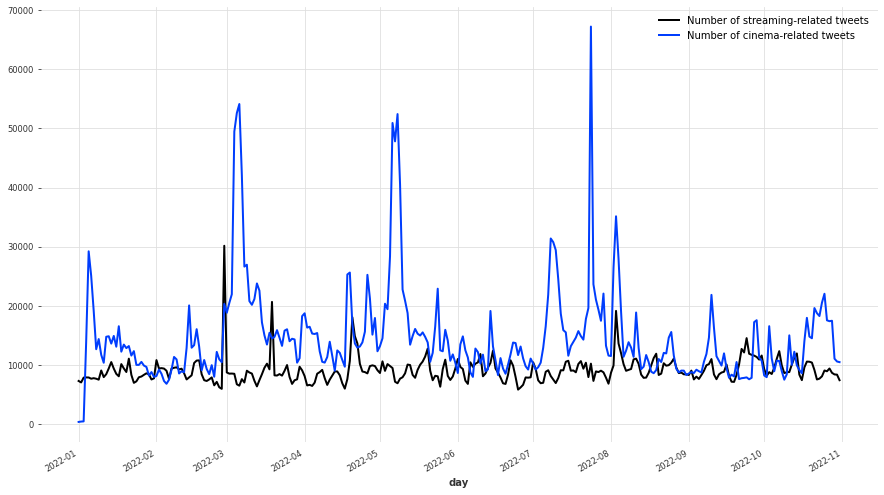

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
series_streaming.plot(label="Number of streaming-related tweets")
series_cinema.plot(label="Number of cinema-related tweets")

In [ ]:
series_no_hero_cinema = TimeSeries.from_dataframe(no_hero_cinema_df, "day", "tweet_Count")

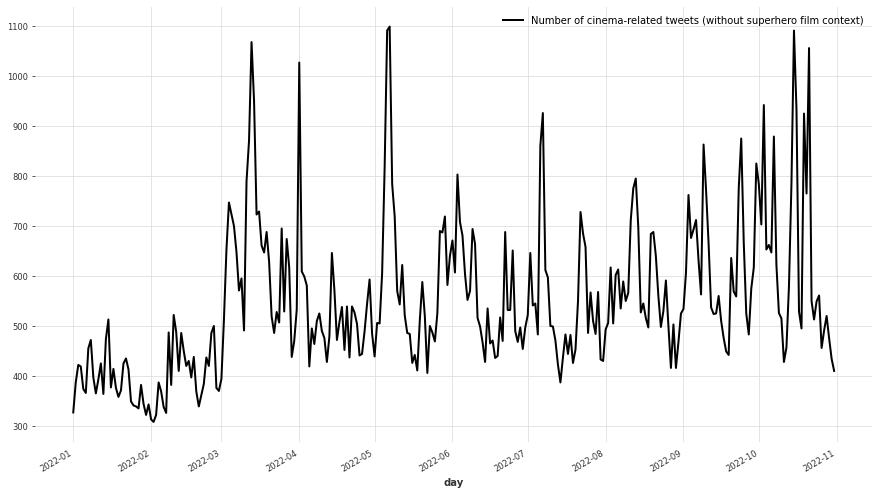

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
series_no_hero_cinema.plot(label="Number of cinema-related tweets (without superhero film context)")

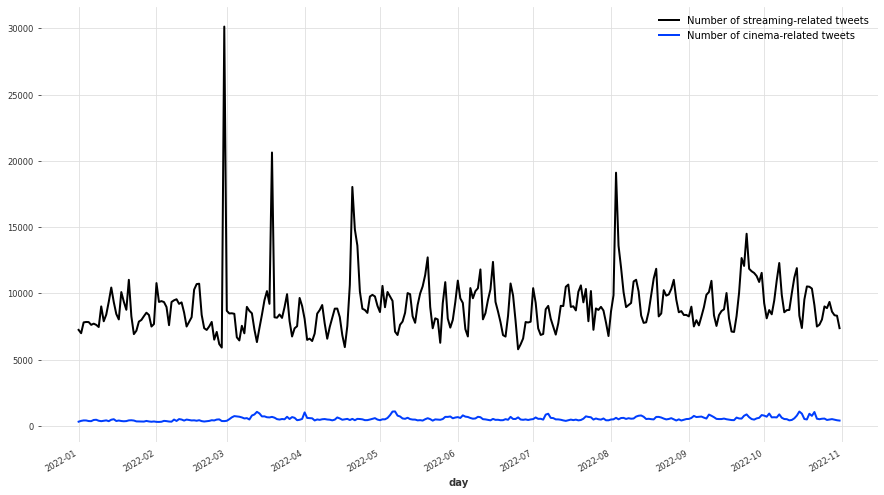

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
series_streaming.plot(label="Number of streaming-related tweets")
series_no_hero_cinema.plot(label="Number of cinema-related tweets")

In [ ]:
series_historical_streaming = TimeSeries.from_dataframe(hist_streaming_df, "day", "tweet_Count")

In [ ]:
series_historical_cinema = TimeSeries.from_dataframe(hist_cinema_df, "day", "tweet_Count")

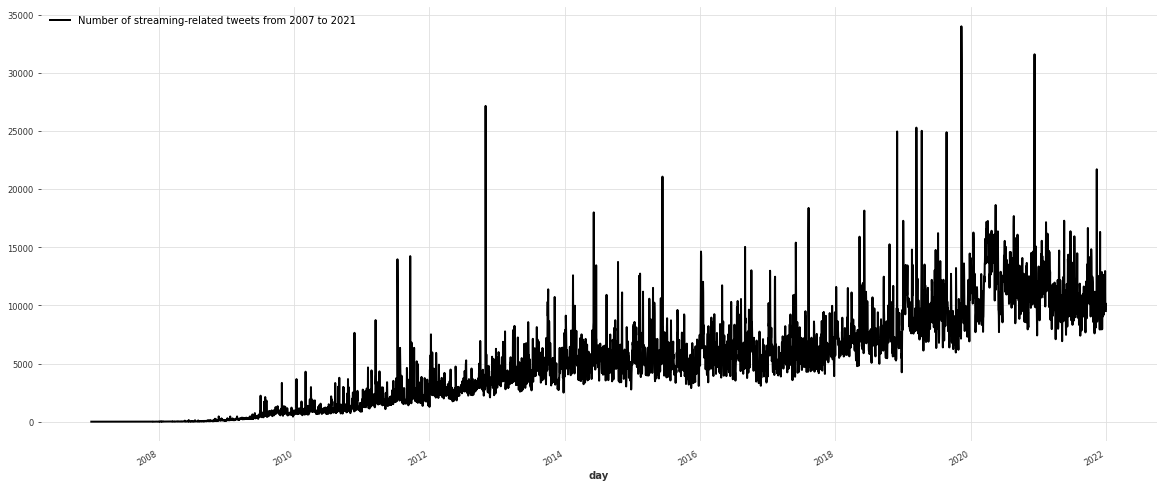

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
series_historical_streaming.plot(label="Number of streaming-related tweets from 2007 to 2021")

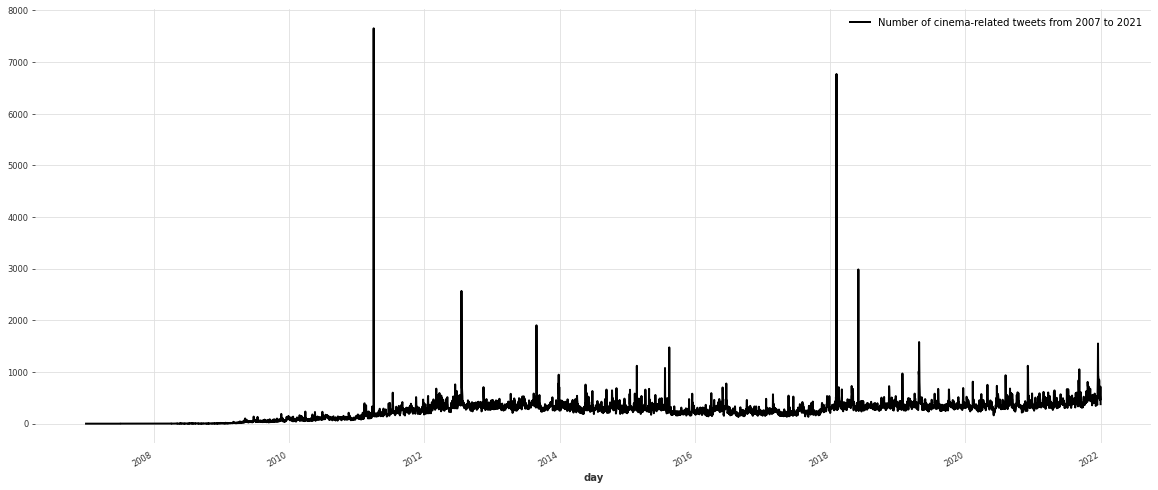

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)
series_historical_cinema.plot(label="Number of cinema-related tweets from 2007 to 2021")

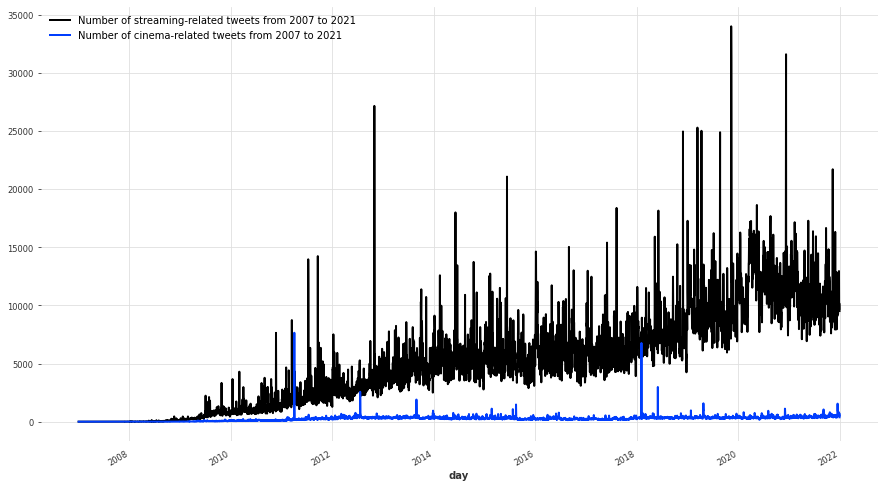

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
series_historical_streaming.plot(label="Number of streaming-related tweets from 2007 to 2021")
series_historical_cinema.plot(label="Number of cinema-related tweets from 2007 to 2021")

Forecasting for streaming-related tweets:
https://unit8co.github.io/darts/quickstart/00-quickstart.html

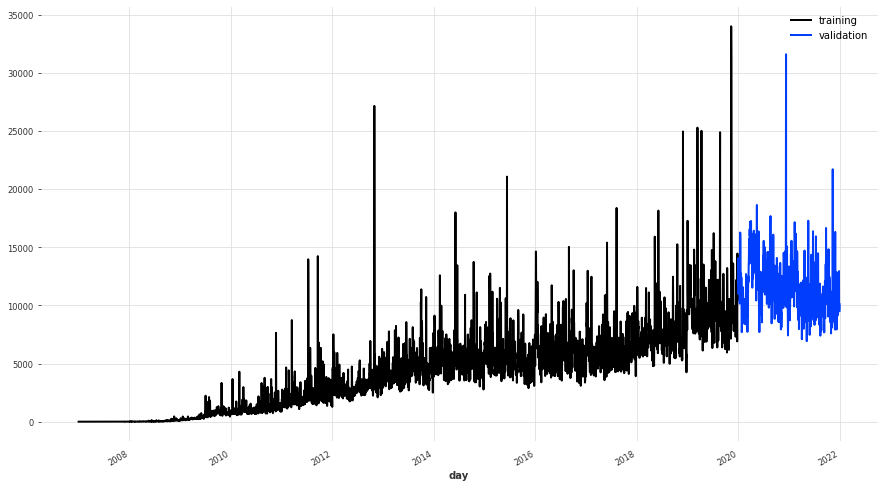

In [ ]:
# Splitting training and testing data for timeseries
train, val = series_historical_streaming.split_before(pd.Timestamp("20200101"))
train.plot(label="training")
val.plot(label="validation")

In [ ]:
from datetime import datetime

datetime_str = '2019-06-01'
datetime_str_2 = '2021-01-01'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d')
datetime_object_2 = datetime.strptime(datetime_str_2, '%Y-%m-%d')

(18048.0, 18628.0)

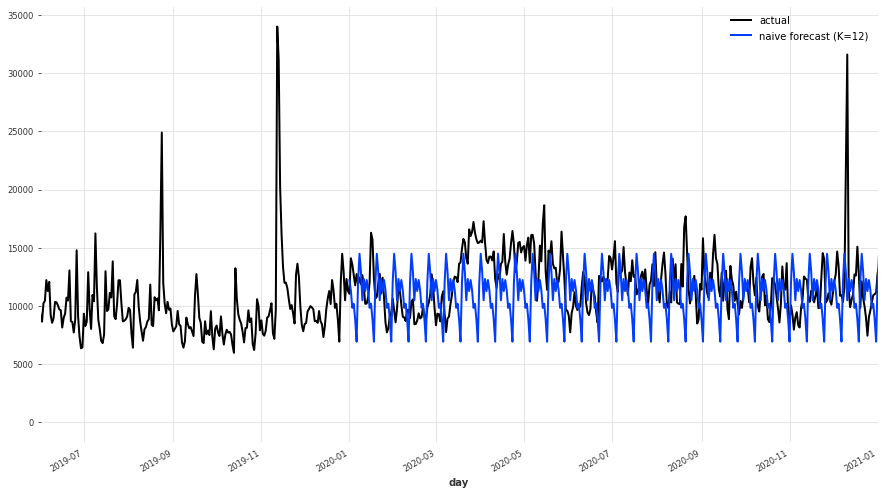

In [ ]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=12)
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))

series_historical_streaming.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=12)")
plt.xlim([datetime_object, datetime_object_2])

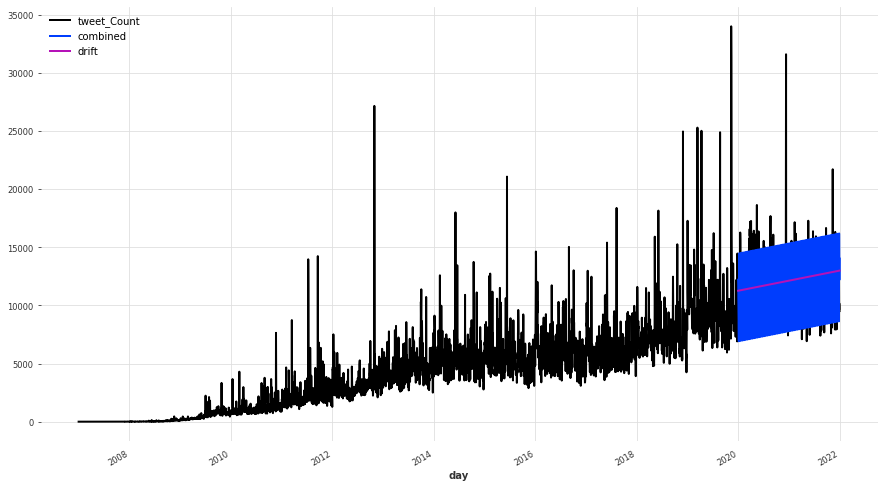

In [ ]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(len(val))

combined_forecast = drift_forecast + naive_forecast - train.last_value()

series_historical_streaming.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")